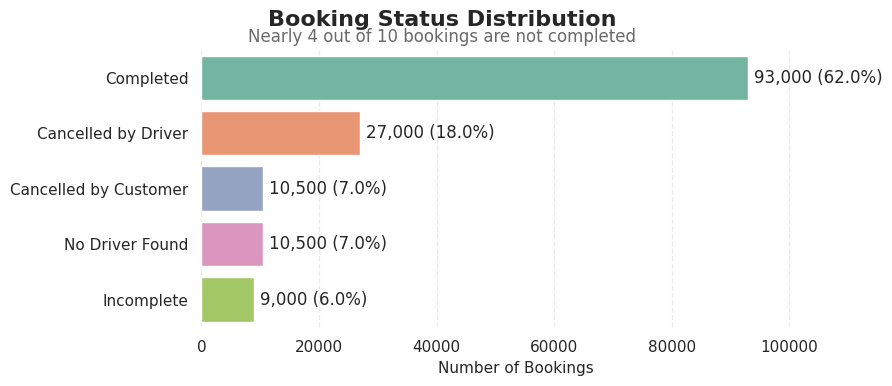

In [43]:
# Chart 1: Booking Status Distribution
# Shows how many bookings fall into each status category.
# Key insight: ~38% of bookings are not completed, mainly due to driver cancellations.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/ncr_ride_bookings.csv")

# Define order of categories
order = ["Completed", "Cancelled by Driver", "Cancelled by Customer", "No Driver Found", "Incomplete"]
counts = df["Booking Status"].value_counts().reindex(order, fill_value=0)
total = len(df)

# Set style and font
sns.set_theme(style="whitegrid", font="DejaVu Sans")

# Create figure
fig, ax = plt.subplots(figsize=(9, 4))

# Horizontal bar chart with a nicer color palette
palette = sns.color_palette("Set2", len(order))

sns.barplot(x=counts.values,
            y=counts.index,
            hue=counts.index,
            dodge=False,
            palette=palette,
            legend=False,
            orient="h",
            ax=ax)

# Main title
fig.suptitle("Booking Status Distribution", fontsize=16, weight="bold", y=0.96)

# Subtitle
fig.text(0.5, 0.88, "Nearly 4 out of 10 bookings are not completed",
         ha="center", fontsize=12, color="dimgray")

# Add value labels (count + percentage)
for i, v in enumerate(counts.values):
    ax.text(v + counts.max()*0.01, i,
            f"{int(v):,} ({v/total:.1%})", va="center")

# Axis labels and grid
ax.set_xlabel("Number of Bookings", fontsize=11)
ax.set_ylabel("")
ax.grid(axis="x", linestyle="--", alpha=0.4)

# Clean up chart borders
sns.despine(left=True, bottom=True)

# Add padding to the right for labels
plt.xlim(0, counts.max()*1.15)

# Adjust layout to leave space for titles
plt.tight_layout(rect=[0, 0, 1.0, 1.0])
plt.show()



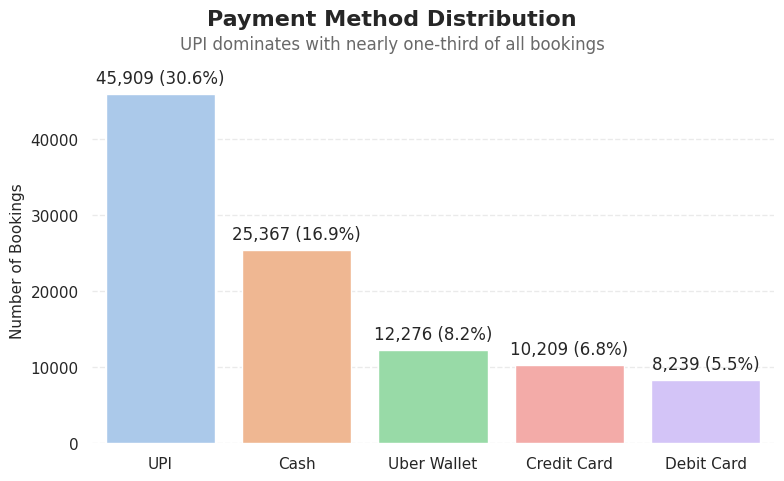

In [44]:
# Chart 2: Payment Method Distribution
# Visualizes how customers pay for their rides.
# Key insight: UPI dominates with nearly one-third of all bookings,
# followed by Cash. Cards and wallets are less common.

pm_counts = df["Payment Method"].value_counts()
pm_order  = pm_counts.index.tolist()
pm_total  = len(df)

sns.set_theme(style="whitegrid", font="DejaVu Sans")
palette = sns.color_palette("pastel", len(pm_order))

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x=pm_counts.index,
            y=pm_counts.values,
            hue=pm_counts.index,
            dodge=False, palette=palette, legend=False,
            ax=ax)

# Main title
fig.suptitle("Payment Method Distribution", fontsize=16, weight="bold", y=0.96)
# Subtitle
fig.text(0.5, 0.88, "UPI dominates with nearly one-third of all bookings",
         ha="center", fontsize=12, color="dimgray")

# Add labels on top of each bar
for i, v in enumerate(pm_counts.values):
    ax.text(i, v + pm_counts.max()*0.02, f"{int(v):,} ({v/pm_total:.1%})",
            ha="center", va="bottom")

ax.set_xlabel("")
ax.set_ylabel("Number of Bookings", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.4)
sns.despine(left=True, bottom=True)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


/tmp/ipython-input-1309361718.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Vehicle Type", y="Customer Rating",


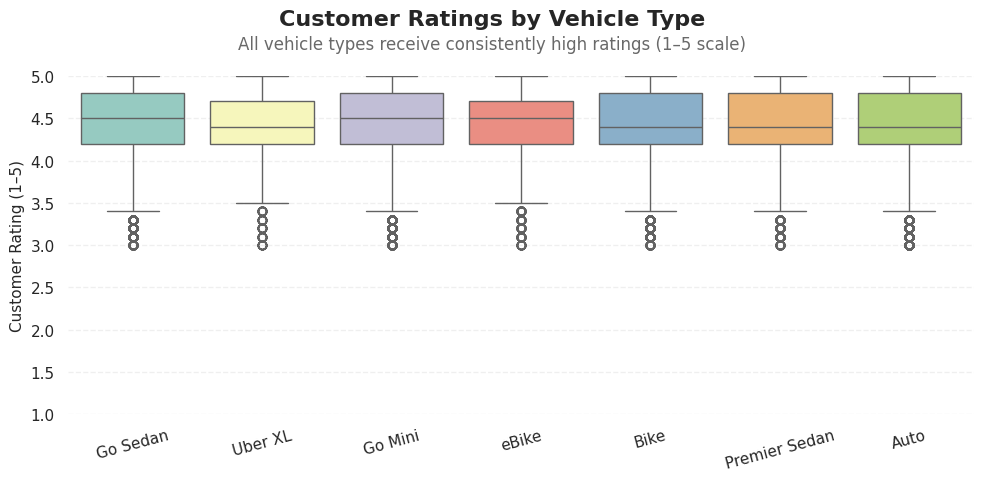

In [45]:
# Chart 3: Customer Ratings by Vehicle Type
# Visualizes customer satisfaction across vehicle types using boxplots.
# Key insight: Ratings are consistently high (mostly 4–5), with only subtle differences
# between vehicle types. Premium categories do not show a major advantage.

# Order vehicle types by mean rating
veh_mean = df.groupby("Vehicle Type")["Customer Rating"].mean().sort_values(ascending=False)
veh_order = veh_mean.index.tolist()

sns.set_theme(style="whitegrid", font="DejaVu Sans")
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(data=df, x="Vehicle Type", y="Customer Rating",
            order=veh_order, palette="Set3", ax=ax)

# Titles
fig.suptitle("Customer Ratings by Vehicle Type", fontsize=16, weight="bold", y=0.96)
fig.text(0.5, 0.88, "All vehicle types receive consistently high ratings (1–5 scale)",
         ha="center", fontsize=12, color="dimgray")

# Y-axis from 1 to 5
ax.set_ylim(1, 5)

# Labels & style
ax.set_xlabel("")
ax.set_ylabel("Customer Rating (1–5)", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipython-input-1795891106.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("dist_bin")


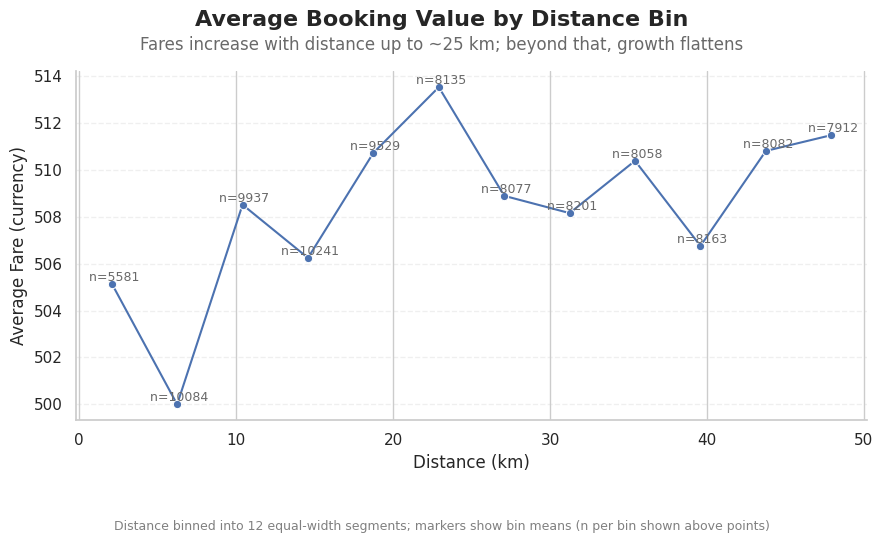

In [46]:
# Chart 4: Average Booking Value by Distance Bin
# Groups rides into equal-width distance bins and shows the average fare for each bin.
# Key insight: Fares increase with distance up to ~25 km; beyond that, growth flattens.

import numpy as np

# --- SETTINGS ---
NUM_BINS = 12  # number of bins; can adjust between ~8–15 depending on data size

# 1) Create equal-width distance bins
dist = df["Ride Distance"].dropna()
fare = df["Booking Value"].dropna()
max_dist = dist.max()

bins = np.linspace(0, max_dist, NUM_BINS + 1)  # divide 0–max into NUM_BINS segments
df_tmp = df.copy()
df_tmp["dist_bin"] = pd.cut(df_tmp["Ride Distance"], bins=bins, include_lowest=True)

# 2) Aggregate: compute mean fare and count of rides in each bin
agg = (
    df_tmp.dropna(subset=["dist_bin", "Booking Value"])
         .groupby("dist_bin")
         .agg(avg_fare=("Booking Value", "mean"),
              n=("Booking Value", "size"))
         .reset_index()
)

# 3) Use bin midpoints for numeric x-axis
agg["bin_mid_km"] = agg["dist_bin"].apply(lambda x: x.mid)

# 4) Plot
sns.set_theme(style="whitegrid", font="DejaVu Sans")
fig, ax = plt.subplots(figsize=(9, 5))

sns.lineplot(
    data=agg, x="bin_mid_km", y="avg_fare",
    marker="o", ax=ax
)

# Title
fig.suptitle("Average Booking Value by Distance Bin", fontsize=16, weight="bold", y=0.96)

# Subtitle: key insight / story
fig.text(0.5, 0.88,
         "Fares increase with distance up to ~25 km; beyond that, growth flattens",
         ha="center", fontsize=12, color="dimgray")

# Caption: technical detail (below chart)
fig.text(0.5, -0.08,
         "Distance binned into 12 equal-width segments; markers show bin means (n per bin shown above points)",
         ha="center", fontsize=9, color="gray")

# Labels & style
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Average Fare (currency)")
ax.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()

# Add counts on top of each point (sample size per bin)
for x, y, c in zip(agg["bin_mid_km"], agg["avg_fare"], agg["n"]):
    ax.text(x, y, f" n={c}", ha="center", va="bottom", fontsize=9, color="dimgray")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


/tmp/ipython-input-1994362901.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["Time"]).dt.hour


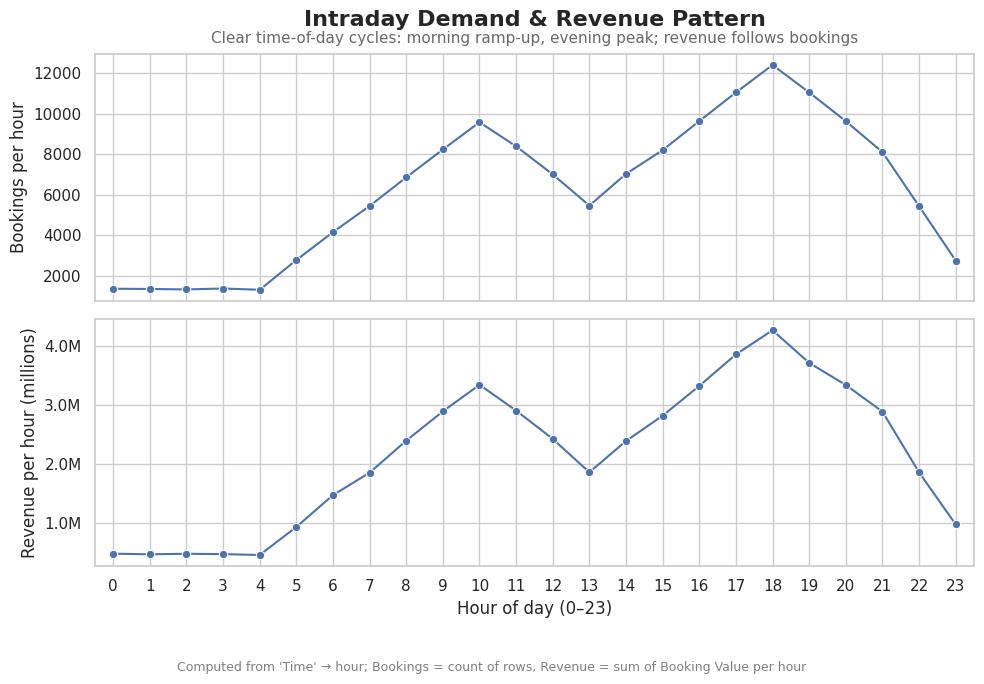

In [47]:
# Chart 5: Intraday Demand & Revenue Pattern
# Visualizes within-day cycles by hour: bookings per hour (top) and revenue per hour (bottom).
# Key insight: clear morning ramp-up and strong evening peak; revenue closely follows bookings.

import matplotlib.ticker as mtick

# --- 1. Prepare data ---
df["hour"] = pd.to_datetime(df["Time"]).dt.hour

agg = (
    df.groupby("hour")
      .agg(bookings=("Booking ID", "count"),
           revenue=("Booking Value", "sum"))
      .reset_index()
)

# --- 2. Plot ---
sns.set_theme(style="whitegrid", font="DejaVu Sans")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Bookings per hour
sns.lineplot(data=agg, x="hour", y="bookings", marker="o", ax=ax1)
ax1.set_ylabel("Bookings per hour")
ax1.set_title("Intraday Demand & Revenue Pattern", fontsize=16, weight="bold", pad=20)
ax1.text(0.5, 1.03,
         "Clear time-of-day cycles: morning ramp-up, evening peak; revenue follows bookings",
         ha="center", va="bottom", transform=ax1.transAxes, fontsize=11, color="dimgray")

# Revenue per hour (in millions)
sns.lineplot(data=agg, x="hour", y="revenue", marker="o", ax=ax2)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))
ax2.set_ylabel("Revenue per hour (millions)")

# X-axis settings
ax2.set_xlabel("Hour of day (0–23)")
ax2.set_xlim(-0.5, 23.5)
ax2.set_xticks(range(0, 24, 1))

# Caption
fig.text(0.5, -0.02,
         "Computed from 'Time' → hour; Bookings = count of rows, Revenue = sum of Booking Value per hour",
         ha="center", fontsize=9, color="gray")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
